In [10]:
using Plots
using LaTeXStrings
using OrdinaryDiffEq

In [11]:
tspan = (0.0, 20.0)
ϵ = 0.1;
a = 1;

In [12]:
function prob2!(dv, v, p, t)
    u = v[1]
    du = v[2]
    dv[1] = du
    dv[2] = -u-ϵ*u^3
end

prob2! (generic function with 1 method)

In [13]:
u0 = [a, 0]
prob = ODEProblem(prob2!, u0, tspan)
sol = solve(prob, Tsit5(), reltol = 1e-8, abstol = 1e-8);

$u(t) \approx a \cos \left(\left(1+\frac{3 a^2}{8} \varepsilon\right) t\right)+\frac{a^3}{32} \varepsilon \cos (3 t)$

In [14]:
# approx(t) = a*cos((1+ϵ*((3*a^2)/8))*t)+ϵ*(a^3/32)*cos(3*t)
tvals = LinRange(tspan[1], tspan[2], 1000);

$u=a \cos t+\epsilon a^3\left[-\frac{3}{8} t \sin t+\frac{1}{32}(\cos 3 t-\cos t)\right]$

In [15]:
s(t) = (1 + (3/8)*a^2*ϵ)*t
approx(t) = a*cos(s(t))+(1/32)*ϵ*a^2*(cos(3*s(t))-cos(s(t)))
rp(t) = a*cos(t)+ϵ*a^3*((-3/8)*t*sin(t)+(1/32)*cos(3*t)-cos(t))

rp (generic function with 1 method)

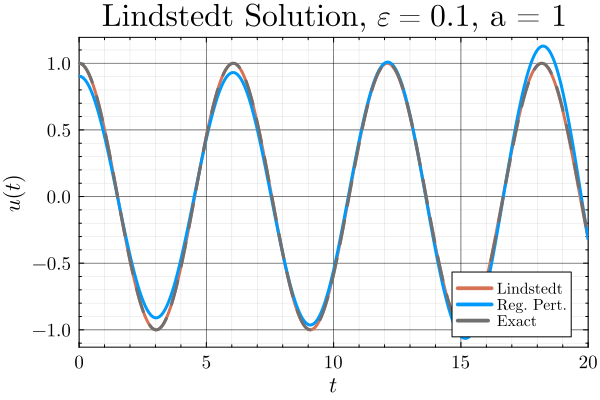

In [16]:
theme(:dao::Symbol)

plot(tvals, [approx.(tvals), rp.(tvals)],
    labels=["Lindstedt" "Reg. Pert."],
    line=(3, :solid),
    )
plot!(sol, 
    idxs=[1],
    line=(3, :dash),
    label="Exact",
    title=L"Lindstedt Solution, $\varepsilon = $"*"$ϵ"*", a = "*"$a",
    xlabel=L"$t$",
    ylabel=L"$u(t)$",
    legend=:best,
    titlefontsize=20,
    tickfontsize=12,
    legendfontsize=10,
    yguidefontsize=15,
    xguidefontsize=15,)
# savefig("Aero_HW5_Prob2.pdf")

In [17]:
numerical_sol = [s[1] for s in sol.(tvals)];
difference = (numerical_sol .- approx.(tvals));
differencerp = (numerical_sol .- rp.(tvals));

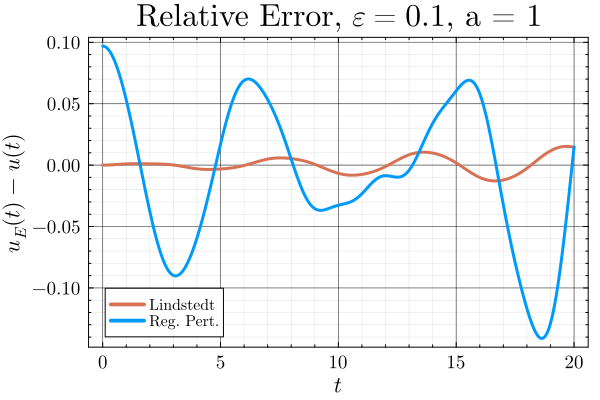

In [18]:
plot(tvals, [difference differencerp], 
    labels=["Lindstedt" "Reg. Pert."],
    line=(3, :solid),
    title=L"Relative Error, $\varepsilon = $"*"$ϵ"*", a = "*"$a",
    xlabel=L"$t$",
    ylabel=L"$u_{E}(t) - u(t)$",
    legend=:best,
    titlefontsize=20,
    tickfontsize=12,
    legendfontsize=10,
    yguidefontsize=15,
    xguidefontsize=15,
    )
# savefig("Aero_HW5_Prob2_error.pdf")